# 7-day ahead prediction stock price prediction

# Aims

Reproduce the article. Version with the imported python code.

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("./../..")

In [3]:
import datetime as dt

In [4]:
from money_machine.data.dataset import load_data, add_ta_data, append_y, drop_nans, divide_test_train, divide_X_y

In [5]:
from money_machine.models.single_layer_LSTM import SingleLayerLSTM
from money_machine.models.manager import Manager
from money_machine.visualization.stock import plot_stock

# Data

In [6]:
ticker = "NKE"

In [7]:
start_train = dt.datetime(2009, 4, 6)
end_train = dt.datetime(2020, 12, 4)
start_test = end_train
end_test = dt.datetime(2021, 12, 20)
data = load_data([ticker], start_train, end_test)[ticker]

In [8]:
data = add_ta_data(data, 14)

In [9]:
n_ahead = 7

In [10]:
data = append_y(data, n_ahead)

In [11]:
data = drop_nans(data)

In [12]:
data_train, data_test = divide_test_train(data, end_train)

In [13]:
train_X, train_y = divide_X_y(data_train)

In [14]:
test_X, test_y = divide_X_y(data_test)

# Model

In [15]:
single_lstm_config_paht = "./../../configs/single_layer_LSTM.yaml"
single_lstm = SingleLayerLSTM(single_lstm_config_paht)

2021-12-27 22:36:04.178554: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
train_config_path = "./../../configs/train_config_single_layer_LSTM.yaml"
single_lstm_manager = Manager(single_lstm, train_config_path)

In [17]:
single_lstm_manager.set_train(train_X, train_y)
single_lstm_manager.set_test(test_X, test_y)

In [18]:
single_lstm_manager.scale_X_y()

In [19]:
single_lstm_manager.compile()

In [20]:
single_lstm_manager.expand_dim_to_3()

In [21]:
single_lstm_manager.train()

Epoch 1/50
91/91 [==============================] - 1s 2ms/step - loss: 0.0011
Epoch 2/50
91/91 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 3/50
91/91 [==============================] - 0s 2ms/step - loss: 9.2284e-04
Epoch 4/50
91/91 [==============================] - 0s 2ms/step - loss: 4.3985e-04
Epoch 5/50
91/91 [==============================] - 0s 2ms/step - loss: 4.5322e-04
Epoch 6/50
91/91 [==============================] - 0s 2ms/step - loss: 4.2240e-04
Epoch 7/50
91/91 [==============================] - 0s 2ms/step - loss: 4.4195e-04
Epoch 8/50
91/91 [==============================] - 0s 2ms/step - loss: 4.6166e-04
Epoch 9/50
91/91 [==============================] - 0s 2ms/step - loss: 4.7725e-04
Epoch 10/50
91/91 [==============================] - 0s 2ms/step - loss: 4.9007e-04
Epoch 11/50
91/91 [==============================] - 0s 2ms/step - loss: 5.0246e-04
Epoch 12/50
91/91 [==============================] - 0s 1ms/step - loss: 5.1453e-04
Epoch 13/

In [22]:
single_lstm_manager.predict()
single_lstm_manager.evaluate()
single_lstm_manager.print_eval()

mae: 6.742958307266235
mape: 0.04622190642045981
mse: 68.63915115727468


# Visualize

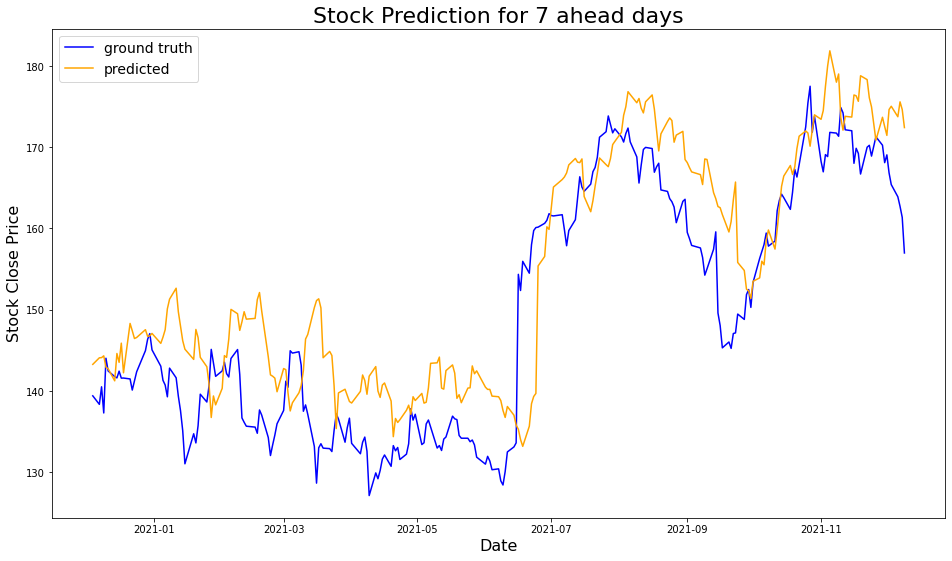

In [23]:
single_lstm_manager.visualize(n_ahead)

In [24]:
single_lstm_manager.y_test_pd

,y
Date,
2020-12-04,139.389999
2020-12-07,138.339996
2020-12-08,140.500000
2020-12-09,137.279999
2020-12-10,144.020004
...,...
2021-12-03,165.399994
2021-12-06,163.899994
2021-12-07,162.720001


In [25]:
single_lstm_manager.y_pred

array([[143.26387],
       [144.07236],
       [144.0943 ],
       [144.31381],
       [142.91861],
       [142.73007],
       [141.23535],
       [144.60374],
       [143.50958],
       [145.8762 ],
       [142.22868],
       [148.30363],
       [147.40225],
       [146.44794],
       [146.57332],
       [147.53577],
       [146.71063],
       [146.77704],
       [147.07275],
       [145.84975],
       [146.61313],
       [147.52925],
       [150.10426],
       [151.29173],
       [152.63971],
       [149.74213],
       [147.91653],
       [146.17586],
       [145.13382],
       [143.87544],
       [147.56532],
       [146.5763 ],
       [144.13116],
       [142.97504],
       [140.84338],
       [136.72334],
       [139.37437],
       [138.28014],
       [140.31267],
       [144.34169],
       [144.12242],
       [146.37665],
       [150.03476],
       [149.49957],
       [147.44827],
       [148.501  ],
       [149.74803],
       [148.83284],
       [148.92268],
       [151.23642],
